In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading data

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
X_train, X_test = np.expand_dims(X_train, -1), np.expand_dims(X_test, -1)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [12]:
X_train.max(), X_test.max()

(255, 255)

In [13]:
X_train, X_test = X_train / 255., X_test / 255.

In [14]:
X_train.max(), X_test.max()

(1.0, 1.0)

## Creating the model

In [17]:
i = tf.keras.layers.Input(X_train[0].shape)

x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(i)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(10, activation="softplus")(x)

In [18]:
model = tf.keras.Model(i, x)

In [19]:
model.compile(
    "adam",
    tf.keras.losses.sparse_categorical_crossentropy,
    metrics="accuracy"
)

In [20]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 19s 5ms/step - loss: 0.2213 - accuracy: 0.9262 - val_loss: 0.0874 - val_accuracy: 0.9742
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0761 - accuracy: 0.9774 - val_loss: 0.0816 - val_accuracy: 0.9768
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0725 - val_accuracy: 0.9794
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.1014 - val_accuracy: 0.9724
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0777 - val_accuracy: 0.9790
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0847 - val_accuracy: 0.9782
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0796 - val_accuracy

## Evaluate

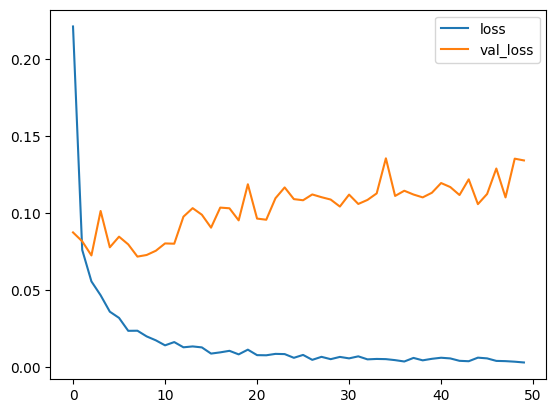

In [26]:
pd.DataFrame(r.history)[["loss", "val_loss"]].plot();

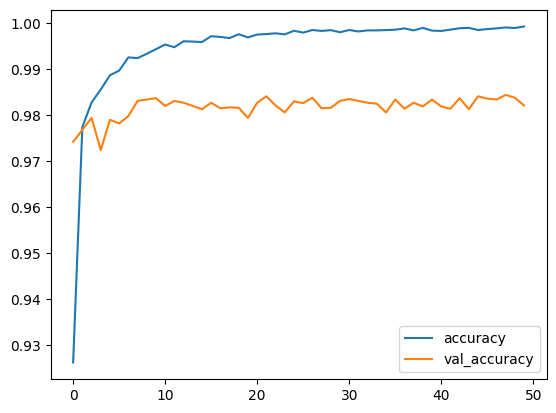

In [27]:
pd.DataFrame(r.history)[["accuracy", "val_accuracy"]].plot();

## Check where model misses

In [30]:
y_test_preds = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [33]:
errors_idx = y_test != y_test_preds

In [34]:
sum(~errors_idx)/len(y_test)

0.9821

In [37]:
errors_idx = np.where(errors_idx)[0]

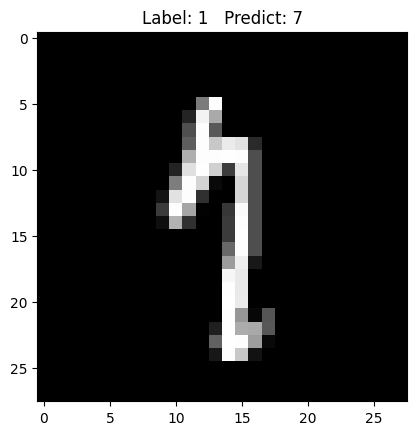

In [44]:
idx = np.random.choice(errors_idx)

plt.imshow(X_test[idx], cmap="gray");
plt.title(f"Label: {y_test[idx]}   Predict: {y_test_preds[idx]}");